<a href="https://colab.research.google.com/github/cbologa/notebook/blob/main/GetRingSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

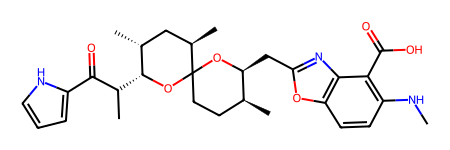

In [7]:
#@title Input SMILES string, then hit `Runtime` -> `Run all`
!pip install --upgrade --quiet rdkit
from rdkit.Chem import *
smiles = 'C[C@H]1CCC2([C@@H](C[C@H]([C@H](O2)C(C)C(=O)C3=CC=CN3)C)C)O[C@H]1CC4=NC5=C(O4)C=CC(=C5C(=O)O)NC' #@param {type:"string"}
mol = MolFromSmiles(smiles)
mol

In [12]:
#@title Print ring systems SMILES
#get atom sets from ring systems
RemoveStereochemistry(mol)
atom_rings = mol.GetRingInfo().AtomRings()
ring_atoms_sets = []
for ring in atom_rings:
  ring_atoms = set(ring)
  new_ring_atoms_sets = []
  for ring_atoms_set in ring_atoms_sets:
    atoms_in_common = len(ring_atoms.intersection(ring_atoms_set))
    if atoms_in_common:
      ring_atoms = ring_atoms.union(ring_atoms_set)
    else:
      new_ring_atoms_sets.append(ring_atoms_set)
  new_ring_atoms_sets.append(ring_atoms)
  ring_atoms_sets = new_ring_atoms_sets
#get ring systems
ring_systems_smiles = []
for atoms_set in ring_atoms_sets:
  smiles = rdmolfiles.MolFragmentToSmiles(mol, atomsToUse=list(atoms_set))
  ring_systems_smiles.append(smiles)
  print(smiles)

C1CCC2(CCCCO2)OC1
c1cc[nH]c1
c1ccc2ocnc2c1


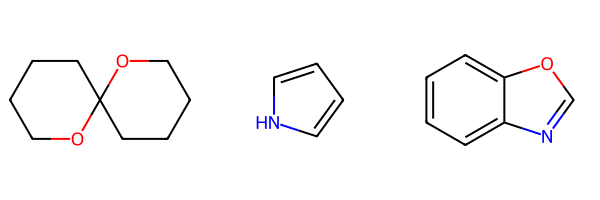

In [13]:
#@title Display ring systems
ring_systems_mols = [MolFromSmiles(smiles) for smiles in ring_systems_smiles]
Draw.MolsToGridImage(ring_systems_mols)